<a href="https://colab.research.google.com/github/nikhomgithub/colab/blob/master/basic_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.nn import relu,softmax
from tensorflow.keras.utils import normalize
import numpy as np
import matplotlib.pyplot as plt
import pickle
from google.colab import files

#get dataset

In [0]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [238]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [240]:
print(x_train[0].dtype)

float64


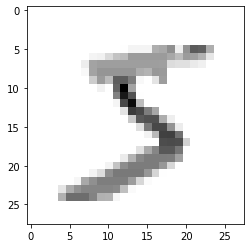

In [241]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
pickle_out=open("x_test.pickle","wb")
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_in=open("x_test.pickle","rb")
pickle.load(pickle_in)
pickle_in.close()

In [0]:
#setup model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation=relu))
model.add(Dense(128,activation=relu))
model.add(Dense(10,activation=softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [245]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.7)

Train on 18000 samples, validate on 42000 samples
Epoch 1/10
18000/18000 [==============================] - 4s 198us/sample - loss: 0.4504 - acc: 0.8709 - val_loss: 0.2444 - val_acc: 0.9255
Epoch 2/10
18000/18000 [==============================] - 3s 188us/sample - loss: 0.1828 - acc: 0.9447 - val_loss: 0.1828 - val_acc: 0.9465
Epoch 3/10
18000/18000 [==============================] - 3s 189us/sample - loss: 0.1229 - acc: 0.9621 - val_loss: 0.1571 - val_acc: 0.9534
Epoch 4/10
18000/18000 [==============================] - 3s 183us/sample - loss: 0.0917 - acc: 0.9717 - val_loss: 0.1526 - val_acc: 0.9540
Epoch 5/10
18000/18000 [==============================] - 3s 187us/sample - loss: 0.0668 - acc: 0.9794 - val_loss: 0.1557 - val_acc: 0.9544
Epoch 6/10
18000/18000 [==============================] - 3s 184us/sample - loss: 0.0515 - acc: 0.9842 - val_loss: 0.1608 - val_acc: 0.9538
Epoch 7/10
18000/18000 [==============================] - 3s 183us/sample - loss: 0.0407 - acc: 0.9868 - val_l

In [246]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
#val_loss,val_acc=model.evaluate(x_test,y_test)

In [0]:
acc=np.array(history.history['acc'])
val_acc=np.array(history.history['val_acc'])
loss=np.array(history.history['loss'])
val_los=np.array(history.history['val_loss'])
epochs=np.array(range(len(acc)))

In [249]:
print(acc.shape)

(10,)


In [250]:
print(epochs.shape)

(10,)


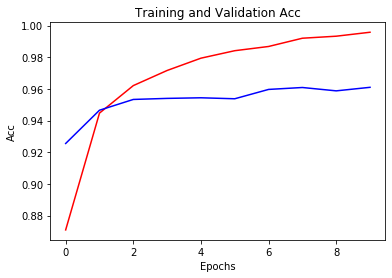

In [251]:
#r is red
plt.plot(epochs, acc,'r',label="Training acc")
#b is blue
plt.plot(epochs,val_acc,'b',label="Validation acc")

plt.title("Training and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

In [0]:
model.save('model01.model')

In [0]:
new_model=load_model('model01.model')

In [0]:
prediction=new_model.predict([x_test])

In [255]:
print(prediction[0])

[6.8417934e-15 4.1617983e-11 5.0942645e-10 1.6816655e-08 9.2645379e-12
 3.6737335e-15 3.9971514e-15 1.0000000e+00 1.0763698e-13 1.1616312e-09]


In [256]:
prediction[0].argmax()

7

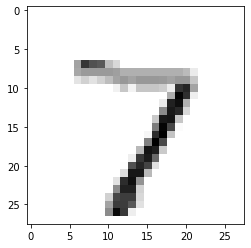

In [257]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [0]:
pickle_out=open("x_test.pickle","wb")
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_in=open("x_test.pickle","rb")
pickle.load(pickle_in)
pickle_in.close()

In [259]:
!ls

model01.model  sample_data  x_test.pickle


Download file from Colab to local browser

In [0]:
files.download('model01.model')

Upload file from loack machine viw browser to Colab

In [266]:
files.upload()

Saving office.jpeg to office.jpeg


{'office.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x12\x13\x13\x15\x16\x15\x15\x16\x15\x17\x16\x15\x17\x16\x15\x17\x16\x15\x15\x16\x18\x17\x17\x17\x15\x16\x17\x18\x1e( \x18\x1a%\x1d\x15\x17!1"%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-%\x1f%/----++0---+-/-/--------/+-------------+----------\xff\xc0\x00\x11\x08\x00\xc2\x01\x03\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x02\x03\x04\x06\x01\x07\x08\xff\xc4\x00@\x10\x00\x02\x01\x02\x03\x05\x05\x04\x07\x06\x06\x03\x01\x00\x00\x00\x01\x02\x03\x00\x11\x04\x12!\x05\x061AQ\x13"aq\x912\x81\xa1\xb1\x07\x14#Br\xc1\xd1\x15Rb\x82\x92\xb234c\xa2\xe1\xf0\x16C\x83S\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\xff\xc4\x006\x11\x00\x02\x02\x01\x03\x02\x03\x05\x06\x04\x07\x00\x00\x00\x00\x00\x00\x01\x02\

In [267]:
!ls

model01.model  office.jpeg  sample_data  x_test.pickle
